In [1]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 77.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import gc
import cv2 as cv
import numpy as np
import canaro
import caer
import os


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
IMG_SIZE=(80,80)
channels =1
char_path =r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'


In [4]:
char_dict ={}

for char in os.listdir(char_path):
    char_dict[char]= len(os.listdir(os.path.join(char_path, char)))
    
# Sort in descending order

char_dict = caer.sort_dict(char_dict, descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [5]:
characters = []
count =0
for i in char_dict:
    characters.append(i[0])
    count +=1
    if count >=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [6]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels= channels,  IMG_SIZE=IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.907850980758667s
[INFO] At 1000 files
[INFO] 1454 files found in 0.7995190620422363s
[INFO] At 1000 files
[INFO] 1452 files found in 0.6884386539459229s
[INFO] At 1000 files
[INFO] 1354 files found in 0.5386214256286621s
[INFO] At 1000 files
[INFO] 1342 files found in 0.48183465003967285s
[INFO] At 1000 files
[INFO] 1291 files found in 0.3670644760131836s
[INFO] At 1000 files
[INFO] 1206 files found in 0.15980768203735352s
[INFO] At 1000 files
[INFO] 1194 files found in 0.10977935791015625s
[INFO] At 1000 files
[INFO] 1193 files found in 0.134049654006958s
[INFO] At 1000 files
[INFO] 1079 files found in 0.006555080413818359s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 41s


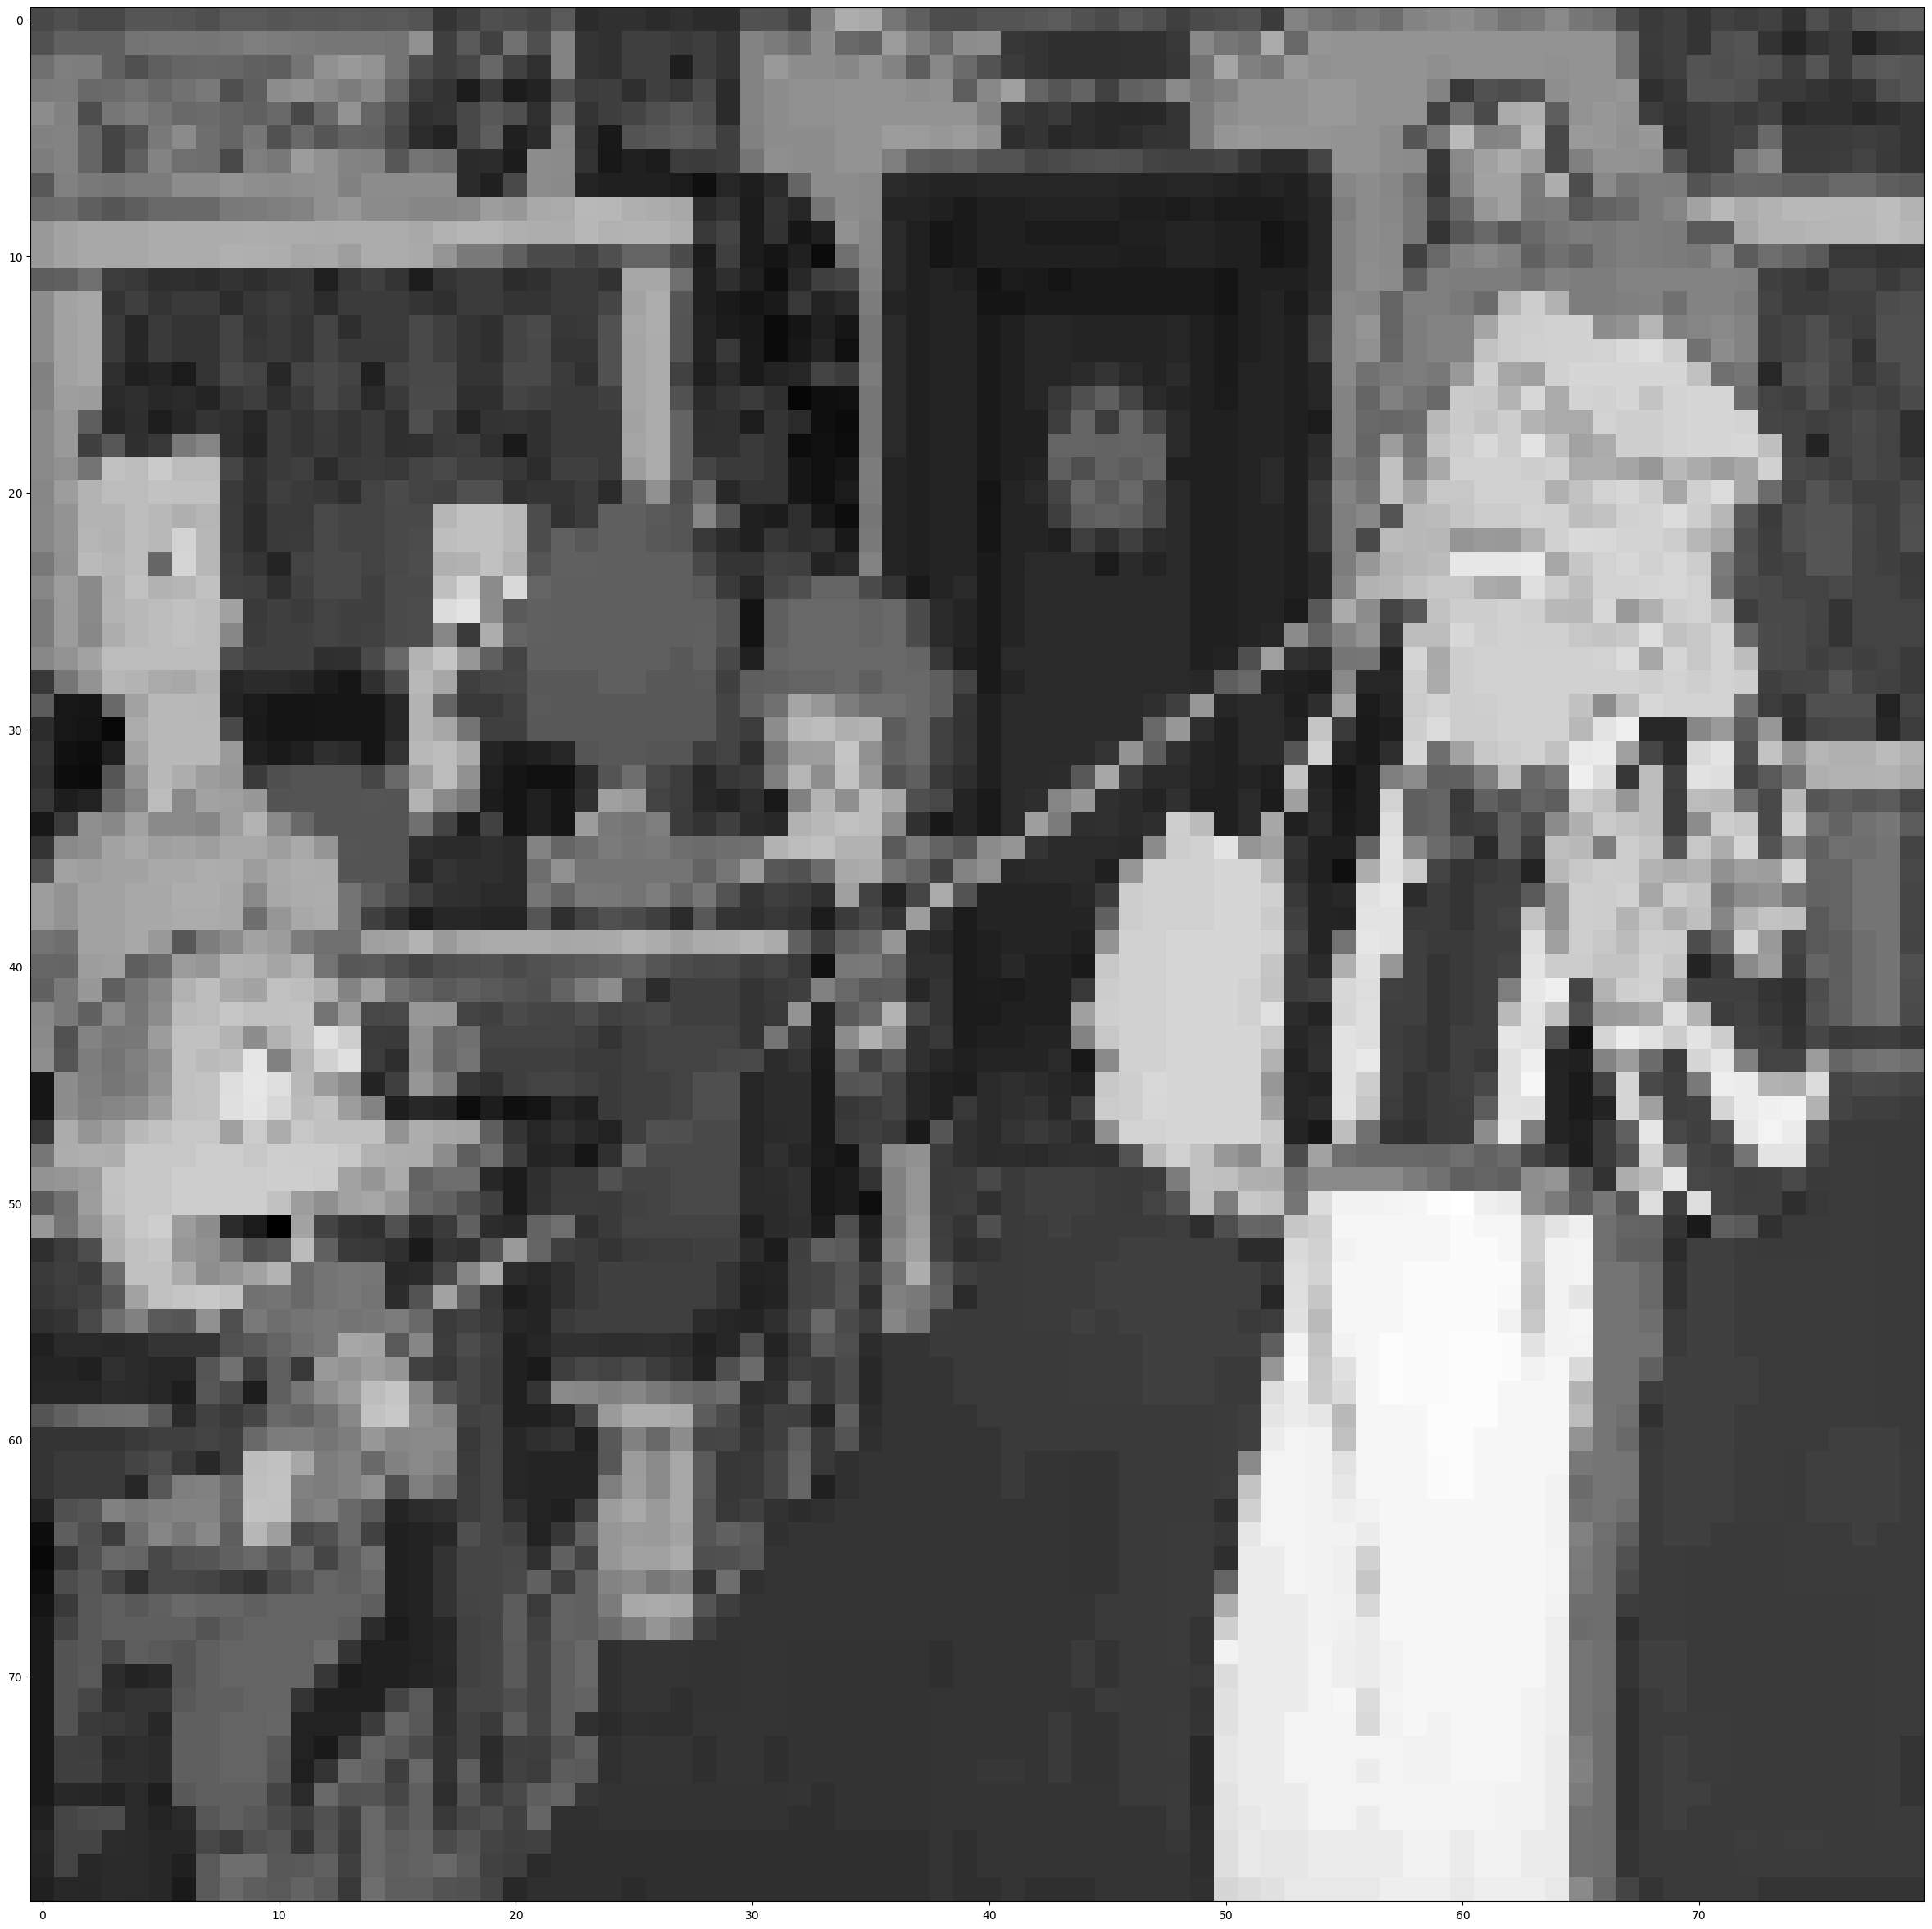

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[4][0], cmap='gray')
plt.show()


In [8]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [9]:
from tensorflow.keras.utils import to_categorical
# Normalize the featureSet ==>(0,1)

featureSet  = caer.normalize(featureSet)

In [10]:
labels=to_categorical(labels, len(characters))

In [11]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=0.2)

In [12]:
del train
del featureSet
del labels
gc.collect()

0

In [13]:
BATCH_SIZE=32
EPOCHS =10

In [14]:
#  Image data generator

datagen =canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [15]:
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.optimizers import SGD
# Creating the model

model = Sequential()
model.add(InputLayer(input_shape = (224,224,3)))
model.add(Conv2D(20,(5,5),activation='relu'))
model.add(Conv2D(20,(5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(5,5),activation='relu'))
model.add(Conv2D(16,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20,(5,5),activation='relu'))
model.add(Conv2D(20,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(20,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(4,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels,output_dim=len(characters), 
#                                           loss ='binary_crossentropy')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 20)      1520      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 20)      10020     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 20)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 16)      8016      
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                    

In [17]:
# from tensorflow.keras.callbacks import LearningRateScheduler
# callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [18]:
# traininf = model.fit(train_gen, steps_per_epoch=len(x_train)//BATCH_SIZE, 
#                      epochs =EPOCHS, 
#                      validation_data= (x_val,y_val), 
#                      validation_steps=len(y_val)//BATCH_SIZE, 
#                      callbacks = callbacks_list)
x_train = x_train/225
x_val = x_val/225

In [19]:
# history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=30, verbose=1)

In [20]:
print(characters)

['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten']


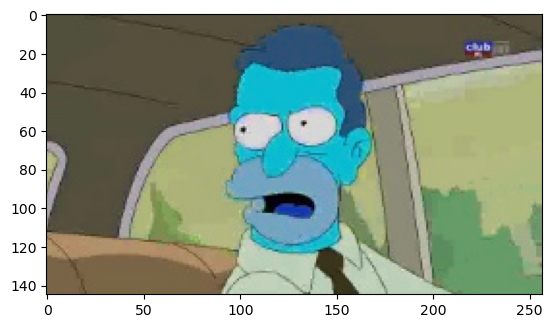

In [21]:
test_path = r'/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_27.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [22]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image
prepare(img)

array([[[[ 74],
         [ 74],
         [ 74],
         ...,
         [ 74],
         [ 75],
         [ 75]],

        [[ 74],
         [ 74],
         [ 74],
         ...,
         [ 75],
         [ 75],
         [ 75]],

        [[ 74],
         [ 74],
         [ 74],
         ...,
         [ 75],
         [ 75],
         [ 75]],

        ...,

        [[ 94],
         [ 94],
         [ 94],
         ...,
         [133],
         [134],
         [134]],

        [[ 94],
         [ 94],
         [ 94],
         ...,
         [134],
         [134],
         [135]],

        [[ 94],
         [ 94],
         [ 94],
         ...,
         [134],
         [134],
         [133]]]], dtype=uint8)

In [23]:
predictions = model.predict(prepare(img))

print(characters[np.argmax(predictions[0])])

ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 80, 80, 1)
